# Cureya Task 4

In [2]:
#load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(0)

In [3]:
# Load our data from the csv file
df = pd.read_csv('data.csv') 

In [5]:
#look at sample of data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
#describe
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
# let's see the total Missing values in dataset
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Exploratory Data Analysis

From description: Minimum price = 0 >>> Not logic

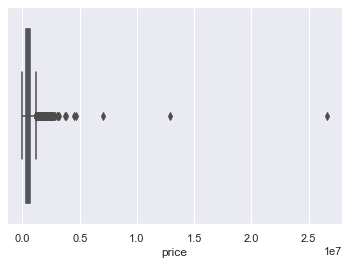

In [6]:
sns.boxplot(x='price', data= df);

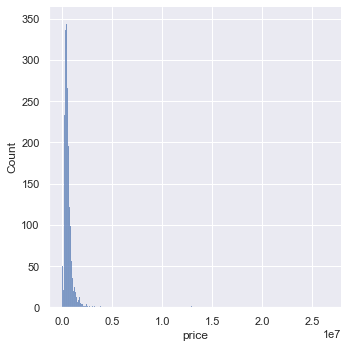

In [7]:
sns.displot(df.price);

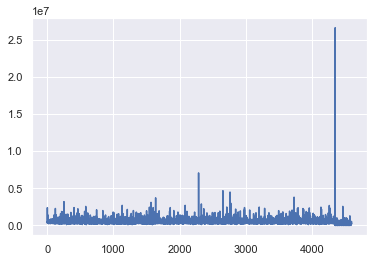

In [8]:
df.price.plot();

remove outliers

In [9]:
def remove_outliers(df, x):
    # Set Limits
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [10]:
df= remove_outliers(df, 'price')

Outliers of "price" are removed



In [11]:
df.shape

(4311, 18)

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.311000e+03,4311.000000,4311.000000,4311.000000,4.311000e+03,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,4.874569e+05,3.351659,2.094352,2030.697982,1.459860e+04,1.495129,0.003711,0.173742,3.443749,1747.008583,283.689399,1970.881234,810.582000
std,2.156596e+05,0.881215,0.715171,810.138266,3.614111e+04,0.536898,0.060815,0.644964,0.669194,763.543329,422.527450,29.506086,979.844447
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.566000e+03,1.500000,0.000000,0.000000,3.000000,1540.000000,0.000000,1976.000000,0.000000
75%,6.150000e+05,4.000000,2.500000,2510.000000,1.069650e+04,2.000000,0.000000,0.000000,4.000000,2190.000000,560.000000,1996.000000,1999.000000
max,1.150000e+06,9.000000,5.750000,7320.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,7320.000000,2300.000000,2014.000000,2014.000000


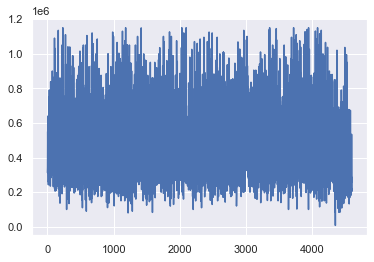

In [13]:
df.price.plot();

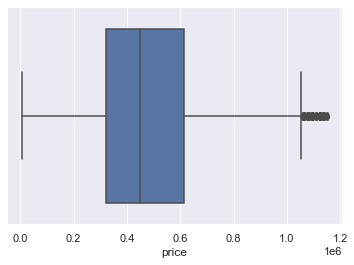

In [14]:
sns.boxplot(x='price', data= df);

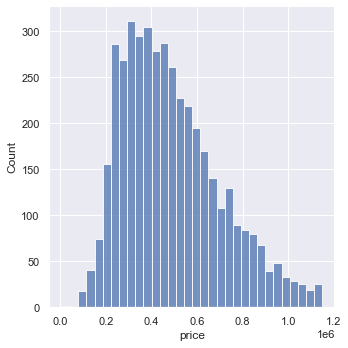

In [15]:
sns.displot(df.price);

In [16]:
# Change to datetime type
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [17]:
# Extract year
df['year']= df.date.dt.year
df.year.value_counts()

2014    4311
Name: year, dtype: int64

All data in the same year >> Not informative

In [18]:
df['month']= df.date.dt.month
df.month.value_counts()

6    2045
5    1659
7     607
Name: month, dtype: int64

Let's use "month" and drop "date" and "year" columns

In [19]:
df.drop(['date', 'year'], axis= 1, inplace= True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,5


now for "bedrooms"

In [20]:
df.bedrooms.value_counts()

3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      10
0.0       1
9.0       1
8.0       1
Name: bedrooms, dtype: int64

0 bedrooms is not normal, also we may neglect 8-9 bedrooms as outliers

In [21]:
df = df[(df['bedrooms'] > 0) & (df['bedrooms'] < 8)]
df.bedrooms= df.bedrooms.astype(int)
df.bedrooms.value_counts()

3    1981
4    1394
2     557
5     282
6      47
1      37
7      10
Name: bedrooms, dtype: int64

In [22]:
df.shape

(4308, 18)

In [23]:
df.bathrooms.value_counts()

2.50    1144
1.00     735
1.75     619
2.00     420
2.25     397
1.50     284
2.75     255
3.00     145
3.50     118
3.25     102
3.75      25
0.75      17
4.00      15
4.50      11
4.25      10
5.00       3
1.25       3
4.75       2
5.50       1
5.75       1
5.25       1
Name: bathrooms, dtype: int64

No. of Bathrooms !! >> let's fix it

In [24]:
df.bathrooms = df.bathrooms.astype(int)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month
0,313000.0,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
2,342000.0,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,420000.0,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,550000.0,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,5
5,490000.0,2,1,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,5


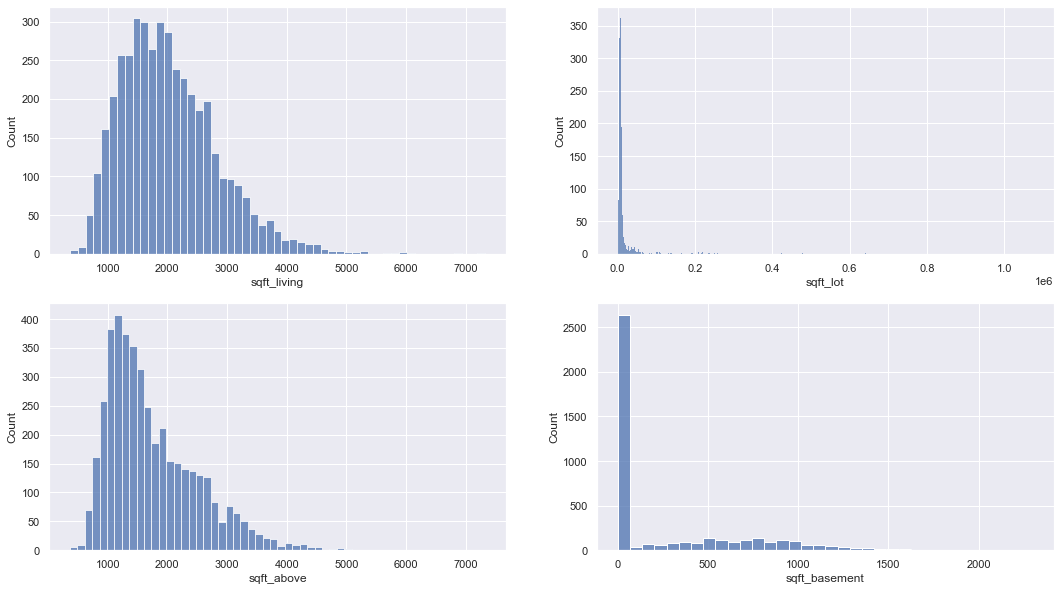

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], x= 'sqft_living', data= df);
sns.histplot(ax=axes[0, 1], x= 'sqft_lot', data= df);
sns.histplot(ax=axes[1, 0], x= 'sqft_above', data= df);
sns.histplot(ax=axes[1, 1], x= 'sqft_basement', data= df);

Exploring "floor"

In [26]:
df.floors.value_counts()

1.0    2105
2.0    1640
1.5     415
3.0     120
2.5      27
3.5       1
Name: floors, dtype: int64

In [27]:
df.floors = df.floors.astype(int)

Exploring "yr_built"

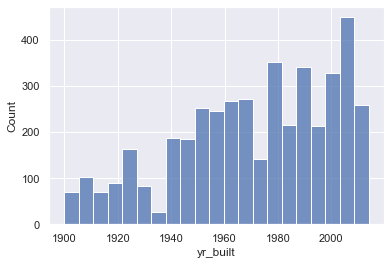

In [28]:
sns.histplot(x= 'yr_built', data=df);

Text(0, 0.5, 'Price')

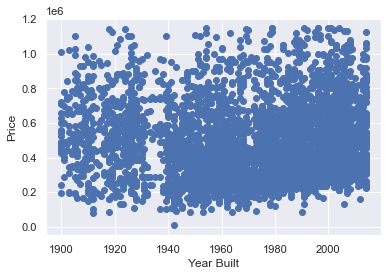

In [29]:
plt.scatter(df.yr_built, df.price);
plt.xlabel("Year Built")
plt.ylabel("Price")

Exploring Address ("street", "city", "statezip", "country)

In [51]:
# drop street
df.drop('street', axis=1, inplace=True)

In [52]:
df.city.nunique()

44

In [53]:
df.city.value_counts()

Seattle                1459
Renton                  291
Bellevue                232
Redmond                 227
Issaquah                183
Kent                    183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               120
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

In [54]:
df.statezip.value_counts()

WA 98103    144
WA 98052    133
WA 98117    129
WA 98115    124
WA 98059    104
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

In [55]:
df.country.value_counts()

USA    4308
Name: country, dtype: int64

In [56]:
# drop "country" and "statezip"
df.drop(["country" , "statezip"], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,5
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,5
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,5
5,490000.0,2,1,880,6380,1,0,0,3,880,0,1938,1994,Seattle,5
